In [2]:
from nixtlats import NixtlaClient

API key

In [5]:
from dotenv import load_dotenv
import os

# Set the TimeGPT API key
def set_api_key():
    load_dotenv()
    api_key = os.getenv("NIXTLATS_API_KEY")
    if api_key is None:
        raise ValueError("Please set the NIXTLATS_API_KEY environment variable")

nixtla_client = NixtlaClient(
    # defaults to os.environ.get("NIXTLA_API_KEY")
    api_key = set_api_key()
)

nixtla_client.validate_api_key()

In [26]:
import pandas as pd
import os

# read txt file
path = os.path.join('..','data','climate', 'AMOCdata.txt')
df = pd.read_csv(path, sep="\s+", names=["time", "AMOC0", "AMOC1", "AMOC2", "GM"], skiprows=1)

df['year'] = df['time'].apply(lambda x: int(x))
df['fraction'] = df['time'].apply(lambda x: x - int(x))

# Convert the fraction to datetime
df['date'] = pd.to_datetime(df['year'], format='%Y') + pd.to_timedelta(df['fraction'] * 365, unit='d')

# Drop the original 'time' column
df = df.drop(columns=['year', 'fraction'])

# remove clock time from date
df['date'] = df['date'].dt.date

# save the data as csv
df.to_csv(os.path.join('..','data','climate', 'AMOCdata.csv'), index=False)

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
/var/folders/ll/fp10h_1j0d1ddcld2t3r_dpr0000gn/T/ipykernel_80404/303796156.py:6: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(path, sep="\s+", names=["time", "AMOC0", "AMOC1", "AMOC2", "GM"], skiprows=1)


In [27]:
df

,time,AMOC0,AMOC1,AMOC2,GM,date
0,1870.0833,0.163951,0.255713,0.347475,-0.091762,1870-01-31
1,1870.1667,0.313431,0.473210,0.632988,-0.159778,1870-03-02
2,1870.2500,0.204185,0.278375,0.352565,-0.074190,1870-04-02
3,1870.3333,0.141020,0.269190,0.397360,-0.128170,1870-05-02
4,1870.4167,0.058445,0.276818,0.495190,-0.218373,1870-06-02
...,...,...,...,...,...,...
1807,2020.6667,0.353692,-0.055918,-0.465528,0.409610,2020-08-31
1808,2020.7500,0.327049,-0.035997,-0.399043,0.363046,2020-09-30
1809,2020.8333,0.254533,-0.053563,-0.361658,0.308095,2020-10-31
1810,2020.9167,-0.053814,-0.326855,-0.599895,0.273040,2020-11-30


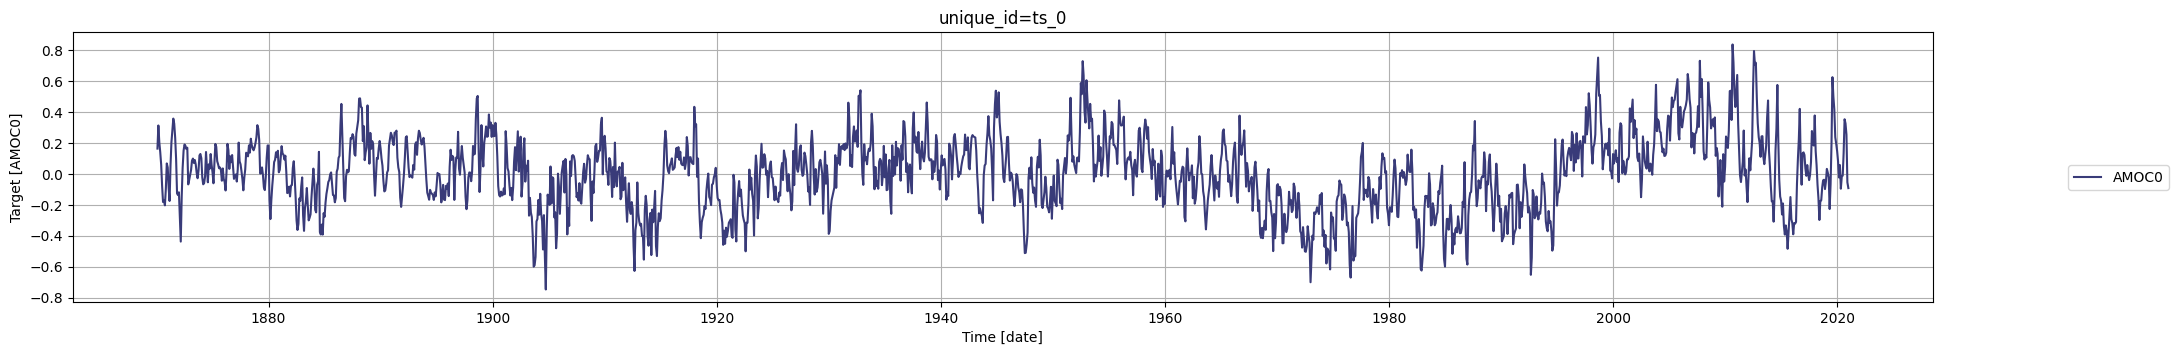

In [34]:
import matplotlib

nixtla_client.plot(df, time_col='date', target_col='AMOC0')

"In the context of monthly data, a period exceeding two years would typically be classified as long-horizon forecasting." URL: https://docs.nixtla.io/docs/forecasting_on_a_long_horizon

* **df**: A pandas dataframe containing the time series data.
* **h**: The number of steps ahead to forecast (in this case in months (MS = month start)).
* **freq**: The frequency of the time series in Pandas format. See pandas’ available frequencies (https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases).
* **time_col**: Column that identifies the datestamp column.
* **target_col**: The variable that we want to forecast.

forecasting the next 12 months using the SDK forecast method:

In [35]:
timegpt_fcst_df = nixtla_client.forecast(df=df, h=12, freq='MS', time_col='date', target_col='AMOC0')
timegpt_fcst_df.head()

INFO:nixtlats.nixtla_client:Validating inputs...
INFO:nixtlats.nixtla_client:Preprocessing dataframes...
INFO:nixtlats.nixtla_client:Calling Forecast Endpoint...


,date,TimeGPT
0,2021-02-01,-0.133660
1,2021-03-01,-0.115507
2,2021-04-01,-0.136631
3,2021-05-01,-0.230935
4,2021-06-01,-0.161688


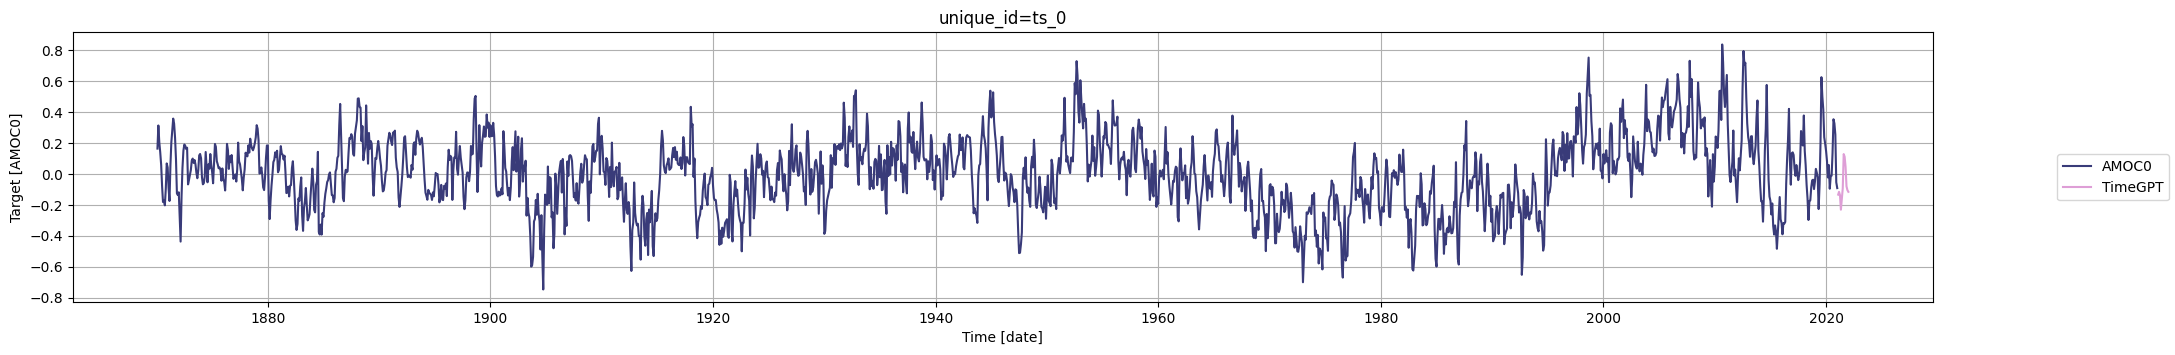

In [36]:
# same plot as above, this time with the forecast (lyserød streg til sidst)
nixtla_client.plot(df, timegpt_fcst_df, time_col='date', target_col='AMOC0')

INFO:nixtlats.nixtla_client:Validating inputs...
INFO:nixtlats.nixtla_client:Preprocessing dataframes...
INFO:nixtlats.nixtla_client:Calling Forecast Endpoint...


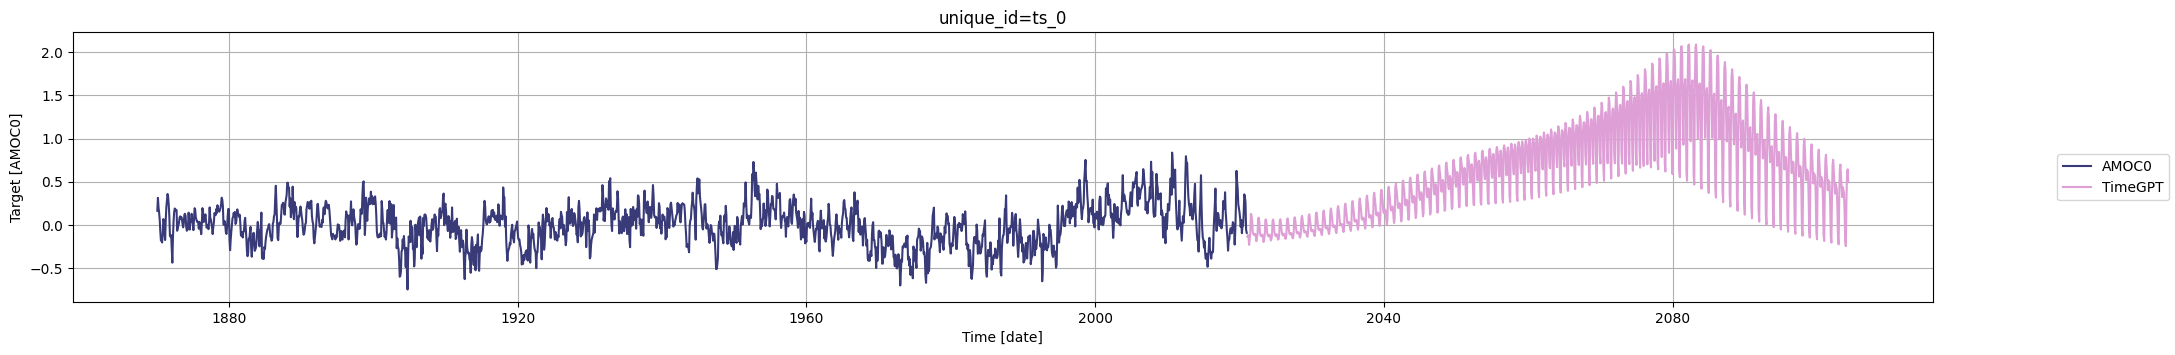

In [39]:
# forecasting and plotting the next 30 years (12*30 = 360)
timegpt_fcst_df = nixtla_client.forecast(df=df, h=1000, freq='MS', time_col='date', target_col='AMOC0')
nixtla_client.plot(df, timegpt_fcst_df, time_col='date', target_col='AMOC0')

More functionalities to look into:

1. Forecasting on long horizon: https://docs.nixtla.io/docs/forecasting_on_a_long_horizon
2. Prediction intervals, how uncertain is prediction "a prediction interval gives an estimated range within which a future observation will fall": https://docs.nixtla.io/docs/prediction_intervals
3. forecasting on irregular timestamps: https://docs.nixtla.io/docs/forecasting_time_series_with_irregular_timestamps
4. Cross validation: https://docs.nixtla.io/docs/cross_validation

In [1]:
1+1

2